In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.svm import LinearSVC as Classifier
from sklearn.model_selection import train_test_split
from pylab import *
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
np_X_data_1 = np.load('np_X_data.npy')
np_Y_data_1 = np.load('np_Y_data.npy')

In [3]:
inception = InceptionV3(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(299,299,3)
)

W0818 19:31:13.567170 4552582592 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
set_of_accuracy=[]
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features = inception.predict(X_train)
    test_features = inception.predict(X_test)
    clf = Classifier()
    clf.fit(training_features, y_train)
    y_predict = clf.predict(test_features)
    acc = clf.score(test_features, y_test)
    set_of_accuracy.append(acc)   

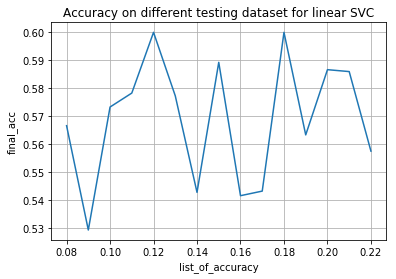

,Test_set,Accuracy
0,0.08,0.566667
1,0.09,0.529412
2,0.10,0.573333
3,0.11,0.578313
4,0.12,0.600000
5,0.13,0.577320
6,0.14,0.542857
7,0.15,0.589286
8,0.16,0.541667
9,0.17,0.543307


In [5]:
plot(list_of_accuracy,set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for linear SVC')
grid(True)
show()
df = {'Test_set': list_of_accuracy, 'Accuracy': set_of_accuracy}
table_SVC = pd.DataFrame(data=df)
table_SVC 

In [6]:
table_SVC.describe()

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.569051
std,0.044721,0.022256
min,0.080000,0.529412
25%,0.115000,0.550441
50%,0.150000,0.573333
75%,0.185000,0.586327
max,0.220000,0.600000


SGDClassifier, GradientBoostingClassifier, RandomForestClassifier, DeDecisionTreeClassifier and GaussianNB

In [7]:
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
set_of_accuracy_sgd=[]
set_of_accuracy_gbc=[]
set_of_accuracy_rfc=[]
set_of_accuracy_gnb=[]
set_of_accuracy_dtc=[]
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features = inception.predict(X_train)
    test_features = inception.predict(X_test)
    clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    clf_sgd.fit(training_features, y_train)
    y_predict = clf_sgd.predict(test_features)
    acc = clf_sgd.score(test_features, y_test)
    set_of_accuracy_sgd.append(acc)  
    clf_gbc = GradientBoostingClassifier()
    clf_gbc.fit(training_features, y_train)
    y_predict_gbc = clf_gbc.predict(test_features)
    acc_gbc = clf_gbc.score(test_features, y_test)
    set_of_accuracy_gbc.append(acc_gbc)  
    regr =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    regr.fit(training_features, y_train)
    y_predict_regr = regr.predict(test_features)
    acc_regr = regr.score(test_features, y_test)
    set_of_accuracy_rfc.append(acc_regr)
    gnb = GaussianNB()
    gnb.fit(training_features, y_train)
    y_predict_gnb = gnb.score(test_features, y_test)
    acc_gbn = gnb.score(test_features, y_test)
    set_of_accuracy_gnb.append(acc_gbn)  
    clf_dtc = DecisionTreeClassifier(random_state=0)
    clf_dtc.fit(training_features, y_train)
    y_predict_dtc = clf_dtc.score(test_features, y_test)
    acc_dtc = clf_dtc.score(test_features, y_test)
    set_of_accuracy_dtc.append(acc_dtc)   

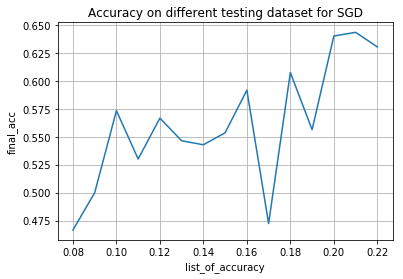

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.561405
std,0.044721,0.055505
min,0.080000,0.466667
25%,0.115000,0.536489
50%,0.150000,0.556338
75%,0.185000,0.599537
max,0.220000,0.643312


In [8]:
plot(list_of_accuracy,set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
df_sgd = {'Test_set': list_of_accuracy, 'Accuracy': set_of_accuracy_sgd}
table_sgd = pd.DataFrame(data=df_sgd)
# table_sgd
table_sgd.describe()

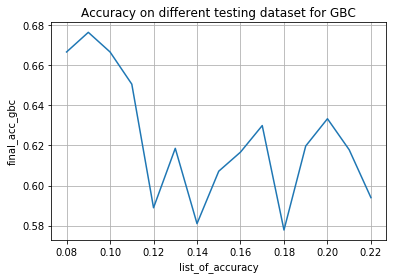

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.623009
std,0.044721,0.031350
min,0.080000,0.577778
25%,0.115000,0.600541
50%,0.150000,0.618557
75%,0.185000,0.641968
max,0.220000,0.676471


In [9]:
plot(list_of_accuracy,set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc_gbc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
df_gbc = {'Test_set': list_of_accuracy, 'Accuracy': set_of_accuracy_gbc}
table_gbc = pd.DataFrame(data=df_gbc)
# table_gbc
table_gbc.describe()

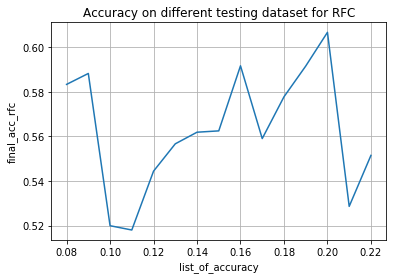

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.562806
std,0.044721,0.027244
min,0.080000,0.518072
25%,0.115000,0.547980
50%,0.150000,0.561905
75%,0.185000,0.585784
max,0.220000,0.606667


In [10]:
plot(list_of_accuracy,set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc_rfc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
df_rfc = {'Test_set': list_of_accuracy, 'Accuracy': set_of_accuracy_rfc}
table_rfc = pd.DataFrame(data=df_rfc)
table_rfc
table_rfc.describe()

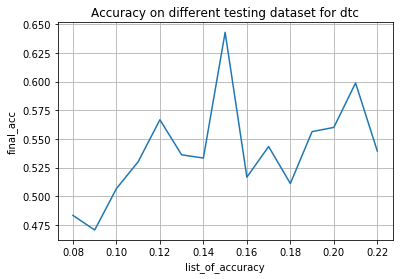

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.539679
std,0.044721,0.043171
min,0.080000,0.470588
25%,0.115000,0.513889
50%,0.150000,0.536082
75%,0.185000,0.558169
max,0.220000,0.642857


In [11]:
plot(list_of_accuracy,set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for dtc')
grid(True)
show()
df_dtc = {'Test_set': list_of_accuracy, 'Accuracy': set_of_accuracy_dtc}
table_dtc = pd.DataFrame(data=df_dtc)
table_dtc
table_dtc.describe()

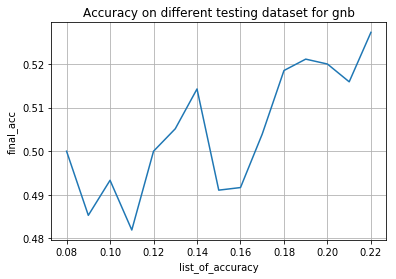

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.504634
std,0.044721,0.014261
min,0.080000,0.481928
25%,0.115000,0.492500
50%,0.150000,0.503937
75%,0.185000,0.517221
max,0.220000,0.527273


In [12]:
plot(list_of_accuracy,set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for gnb')
grid(True)
show()
df_gnb = {'Test_set': list_of_accuracy, 'Accuracy': set_of_accuracy_gnb}
table_gnb = pd.DataFrame(data=df_gnb)
table_gnb
table_gnb.describe()

PCA Inception

In [13]:
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
pca_set_of_accuracy=[]
pca_set_of_accuracy_sgd=[]
pca_set_of_accuracy_gbc=[]
pca_set_of_accuracy_rfc=[]
pca_set_of_accuracy_gnb=[]
pca_set_of_accuracy_dtc=[]

for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_pca = inception.predict(X_train)
    test_features_pca = inception.predict(X_test)
    pca = PCA(n_components=400)
    pca.fit(training_features_pca)
    pca_training_features = pca.fit_transform(training_features_pca)
    pca_test_features=pca.transform(test_features_pca)
    # linear SVC
    clf = Classifier()
    clf.fit(pca_training_features, y_train)
    y_predict = clf.predict(pca_test_features)
    pca_acc_SVC = clf.score(pca_test_features, y_test)
    pca_set_of_accuracy.append(pca_acc_SVC)
#    # SGD
    pca_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    pca_clf_sgd.fit(pca_training_features, y_train)
    y_predict = pca_clf_sgd.predict(pca_test_features)
    pca_acc_sgd = pca_clf_sgd.score(pca_test_features, y_test)
    pca_set_of_accuracy_sgd.append(pca_acc_sgd) 
#     #GBC
    pca_clf_gbc = GradientBoostingClassifier()
    pca_clf_gbc.fit(pca_training_features, y_train)
    y_predict_gbc = pca_clf_gbc.predict(pca_test_features)
    pca_acc_gbc = pca_clf_gbc.score(pca_test_features, y_test)
    pca_set_of_accuracy_gbc.append(pca_acc_gbc) 
#     # RFC
    pca_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    pca_rfc_clf.fit(pca_training_features, y_train)
    y_predict_regr = pca_rfc_clf.predict(pca_test_features)
    pca_acc_regr = pca_rfc_clf.score(pca_test_features, y_test)
    pca_set_of_accuracy_rfc.append(pca_acc_regr)
#     # NB
    pca_clf_gnb = GaussianNB()
    pca_clf_gnb.fit(pca_training_features, y_train)
    y_predict_gnb = pca_clf_gnb.score(pca_test_features, y_test)
    pca_acc_gbn = pca_clf_gnb.score(pca_test_features, y_test)
    pca_set_of_accuracy_gnb.append(pca_acc_gbn)
#     # DTC
    pca_clf_dtc = DecisionTreeClassifier(random_state=0)
    pca_clf_dtc.fit(pca_training_features, y_train)
    y_predict_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_acc_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_set_of_accuracy_dtc.append(pca_acc_dtc)   

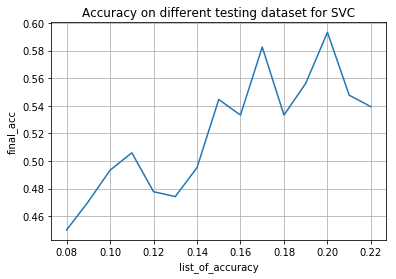

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.519867
std,0.044721,0.042658
min,0.080000,0.450000
25%,0.115000,0.485556
50%,0.150000,0.533333
75%,0.185000,0.546207
max,0.220000,0.593333


In [14]:
plot(list_of_accuracy,pca_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
pca_df = {'Test_set': list_of_accuracy, 'Accuracy': pca_set_of_accuracy}
pca_table = pd.DataFrame(data=pca_df)
pca_table
pca_table.describe()

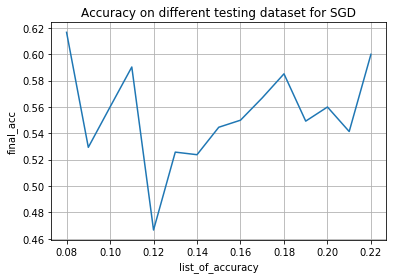

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.554010
std,0.044721,0.036646
min,0.080000,0.466667
25%,0.115000,0.535407
50%,0.150000,0.550000
75%,0.185000,0.576057
max,0.220000,0.616667


In [15]:
plot(list_of_accuracy,pca_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
pca_df_sgd = {'Test_set': list_of_accuracy, 'Accuracy': pca_set_of_accuracy_sgd}
pca_table_sgd = pd.DataFrame(data=pca_df_sgd)
pca_table_sgd
pca_table_sgd.describe()

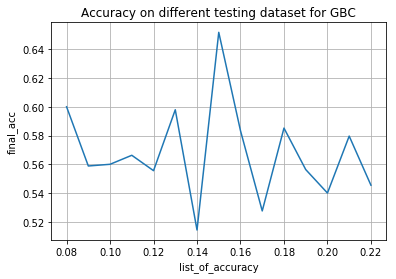

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.568143
std,0.044721,0.033658
min,0.080000,0.514286
25%,0.115000,0.550505
50%,0.150000,0.560000
75%,0.185000,0.584259
max,0.220000,0.651786


In [16]:
plot(list_of_accuracy,pca_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
pca_df_gbc = {'Test_set': list_of_accuracy, 'Accuracy': pca_set_of_accuracy_gbc}
pca_table_gbc = pd.DataFrame(data=pca_df_gbc)
pca_table_gbc
pca_table_gbc.describe()

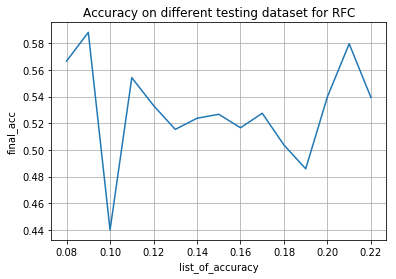

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.529425
std,0.044721,0.036992
min,0.080000,0.440000
25%,0.115000,0.516065
50%,0.150000,0.527559
75%,0.185000,0.547108
max,0.220000,0.588235


In [17]:
plot(list_of_accuracy,pca_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
pca_df_rfc = {'Test_set': list_of_accuracy, 'Accuracy': pca_set_of_accuracy_rfc}
pca_table_rfc = pd.DataFrame(data=pca_df_rfc)
pca_table_rfc
pca_table_rfc.describe()

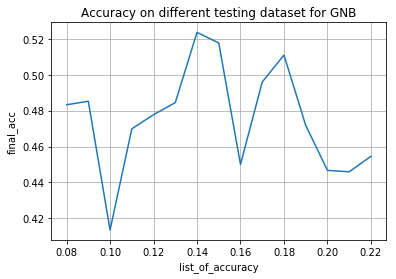

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.475460
std,0.044721,0.030204
min,0.080000,0.413333
25%,0.115000,0.452273
50%,0.150000,0.477778
75%,0.185000,0.490679
max,0.220000,0.523810


In [18]:
plot(list_of_accuracy,pca_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GNB')
grid(True)
show()
pca_df_gnb = {'Test_set': list_of_accuracy, 'Accuracy': pca_set_of_accuracy_gnb}
pca_table_gnb = pd.DataFrame(data=pca_df_gnb)
pca_table_gnb
pca_table_gnb.describe()

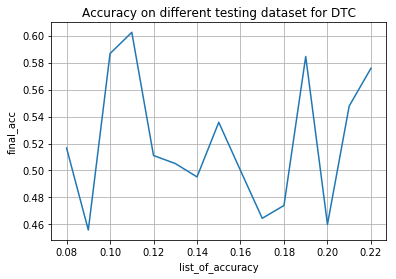

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.521035
std,0.044721,0.049081
min,0.080000,0.455882
25%,0.115000,0.484656
50%,0.150000,0.511111
75%,0.185000,0.561764
max,0.220000,0.602410


In [19]:
plot(list_of_accuracy,pca_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
pca_df_dtc = {'Test_set': list_of_accuracy, 'Accuracy': pca_set_of_accuracy_dtc}
pca_table_dtc = pd.DataFrame(data=pca_df_dtc)
pca_table_dtc
pca_table_dtc.describe()

SVM

In [20]:
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
svd_set_of_accuracy=[]
svd_set_of_accuracy_sgd=[]
svd_set_of_accuracy_gbc=[]
svd_set_of_accuracy_rfc=[]
svd_set_of_accuracy_gnb=[]
svd_set_of_accuracy_dtc=[]

for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_svd = inception.predict(X_train)
    test_features_svd = inception.predict(X_test)
    svd = TruncatedSVD(n_components=550,n_iter=7)
    svd.fit(training_features_svd)
    svd_training_features = svd.fit_transform(training_features_svd)
    svd_test_features=svd.transform(test_features_svd)
    # linear SVC
    clf = Classifier()
    clf.fit(svd_training_features, y_train)
    y_predict = clf.predict(svd_test_features)
    svd_acc_SVC = clf.score(svd_test_features, y_test)
    svd_set_of_accuracy.append(svd_acc_SVC)
    # SGD
    svd_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    svd_clf_sgd.fit(svd_training_features, y_train)
    y_predict = svd_clf_sgd.predict(svd_test_features)
    svd_acc_sgd = svd_clf_sgd.score(svd_test_features, y_test)
    svd_set_of_accuracy_sgd.append(svd_acc_sgd) 
#     #GBC
    svd_clf_gbc = GradientBoostingClassifier()
    svd_clf_gbc.fit(svd_training_features, y_train)
    y_predict_gbc = svd_clf_gbc.predict(svd_test_features)
    svd_acc_gbc = svd_clf_gbc.score(svd_test_features, y_test)
    svd_set_of_accuracy_gbc.append(svd_acc_gbc) 
#     # RFC
    svd_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    svd_rfc_clf.fit(svd_training_features, y_train)
    y_predict_regr = svd_rfc_clf.predict(svd_test_features)
    svd_acc_regr = svd_rfc_clf.score(svd_test_features, y_test)
    svd_set_of_accuracy_rfc.append(svd_acc_regr)
#     # NB
    svd_clf_gnb = GaussianNB()
    svd_clf_gnb.fit(svd_training_features, y_train)
    y_predict_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_acc_gbn = svd_clf_gnb.score(svd_test_features, y_test)
    svd_set_of_accuracy_gnb.append(svd_acc_gbn)
#     # DTC
    svd_clf_dtc = DecisionTreeClassifier(random_state=0)
    svd_clf_dtc.fit(svd_training_features, y_train)
    y_predict_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_acc_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_set_of_accuracy_dtc.append(svd_acc_dtc)   

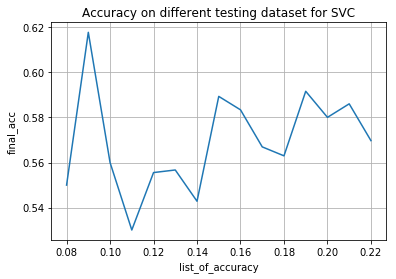

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.569508
std,0.044721,0.022213
min,0.080000,0.530120
25%,0.115000,0.556128
50%,0.150000,0.566929
75%,0.185000,0.584660
max,0.220000,0.617647


In [21]:
plot(list_of_accuracy,svd_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
svd_df = {'Test_set': list_of_accuracy, 'Accuracy': svd_set_of_accuracy}
svd_table = pd.DataFrame(data=svd_df)
svd_table
svd_table.describe()

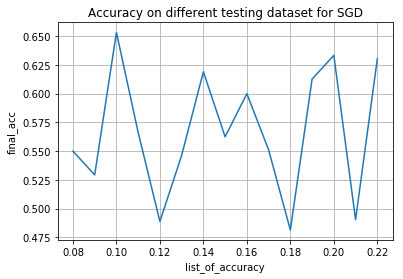

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.567684
std,0.044721,0.055685
min,0.080000,0.481481
25%,0.115000,0.537902
50%,0.150000,0.562500
75%,0.185000,0.615862
max,0.220000,0.653333


In [22]:
plot(list_of_accuracy,svd_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
svd_df_sgd = {'Test_set': list_of_accuracy, 'Accuracy': svd_set_of_accuracy_sgd}
svd_table_sgd = pd.DataFrame(data=svd_df_sgd)
svd_table_sgd
svd_table_sgd.describe()

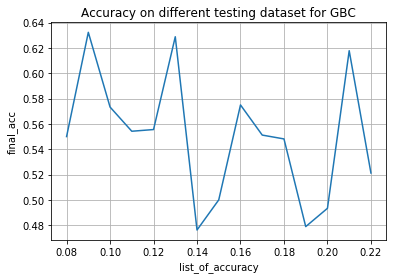

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.550406
std,0.044721,0.050618
min,0.080000,0.476190
25%,0.115000,0.510606
50%,0.150000,0.551181
75%,0.185000,0.574167
max,0.220000,0.632353


In [23]:
plot(list_of_accuracy,svd_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
svd_df_gbc = {'Test_set': list_of_accuracy, 'Accuracy': svd_set_of_accuracy_gbc}
svd_table_gbc = pd.DataFrame(data=svd_df_gbc)
svd_table_gbc
svd_table_gbc.describe()

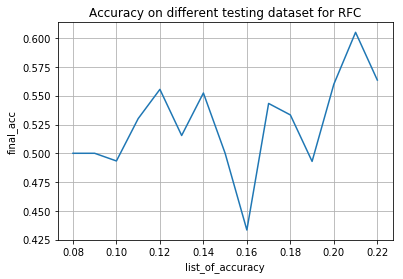

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.525235
std,0.044721,0.041096
min,0.080000,0.433333
25%,0.115000,0.500000
50%,0.150000,0.530120
75%,0.185000,0.553968
max,0.220000,0.605096


In [24]:
plot(list_of_accuracy,svd_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
svd_df_rfc = {'Test_set': list_of_accuracy, 'Accuracy': svd_set_of_accuracy_rfc}
svd_table_rfc = pd.DataFrame(data=svd_df_rfc)
svd_table_rfc
svd_table_rfc.describe()

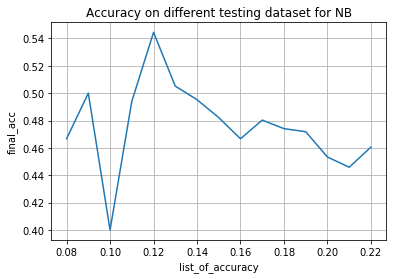

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.476021
std,0.044721,0.032172
min,0.080000,0.400000
25%,0.115000,0.463636
50%,0.150000,0.474074
75%,0.185000,0.494607
max,0.220000,0.544444


In [25]:
plot(list_of_accuracy,svd_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for NB')
grid(True)
show()
svd_df_gnb = {'Test_set': list_of_accuracy, 'Accuracy': svd_set_of_accuracy_gnb}
svd_table_gnb = pd.DataFrame(data=svd_df_gnb)
svd_table_gnb
svd_table_gnb.describe()

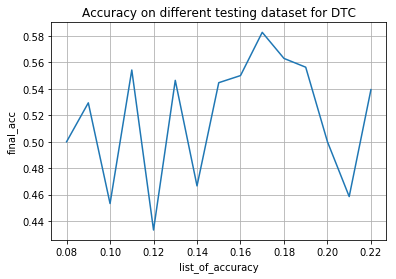

,Test_set,Accuracy
count,15.000000,15.000000
mean,0.150000,0.518531
std,0.044721,0.046500
min,0.080000,0.433333
25%,0.115000,0.483333
50%,0.150000,0.539394
75%,0.185000,0.552108
max,0.220000,0.582677


In [26]:
plot(list_of_accuracy,svd_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
svd_df_dtc = {'Test_set': list_of_accuracy, 'Accuracy': svd_set_of_accuracy_dtc}
svd_table_dtc = pd.DataFrame(data=svd_df_dtc)
svd_table_dtc
svd_table_dtc.describe()